In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

## 1. Global Earthquakes

First read the data and sort the data by magnitude and select the first 50th rows, then plot them on the map with scatter method.


In [7]:
# Read in the earthquakes data
earthquake = pd.read_csv('usgs_earthquakes.csv')
top_50_2014 = earthquake.sort_values(by='mag',ascending=False).head(50).reset_index(drop=True)

Text(-0.07, 0.55, 'Latitude')

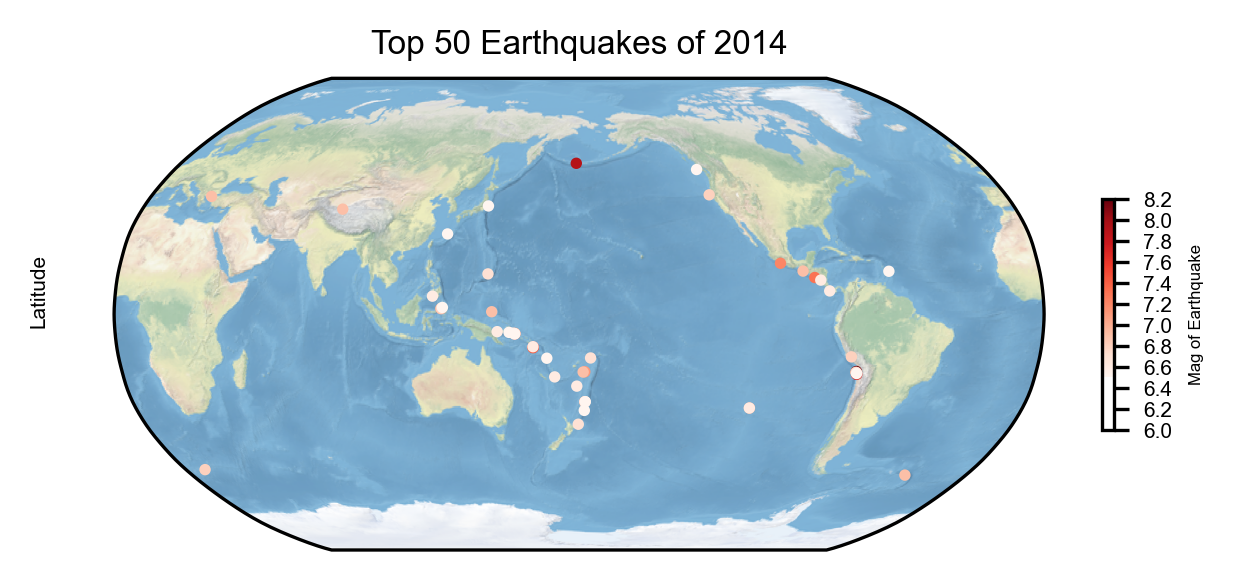

In [8]:
# Create and define the size of figure
plt.figure(figsize=(5,5), dpi=300)

# Create an axis with Robinson Projection
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection = proj)

# Set font
font01 = {'family':'Arial', 'weight':'normal','size':8}
font02 = {'family':'Arial', 'weight':'normal','size':5}
font03 = {'family':'Arial', 'weight':'normal','size':4}

# Add features
ax.set_global()
ax.stock_img()
plt.title('Top 50 Earthquakes of 2014', font01)

# Add point of earthquake
scatter = ax.scatter(top_50_2014['longitude'], top_50_2014['latitude'],  c=top_50_2014['mag'], cmap='Reds', s=3, transform=ccrs.PlateCarree())
colorbar = plt.colorbar(scatter, shrink=0.2)
colorbar.set_label('Mag of Earthquake', fontdict = font03)
# Set the font of number on colorbar
tick_labels = colorbar.ax.get_yticklabels()
for label in tick_labels:
    label.set_fontproperties(font02)
# Set new ticks
new_ticks = np.arange(6, 8.21, 0.2)
colorbar.set_ticks(new_ticks)

# Add text
ax.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontdict = font02, transform=ax.transAxes)




## 2. Explore a netCDF dataset

A wrfout data was used, which is a netCDF file. First read the data and then plot the data on the map, add different features. use `ax2.add_feature(cfeature.OCEAN, linewidth=0.8, zorder=1)` to mask the data with ocean.

Use `set_extent([90, 130, 0, 40])` to plot the regional map

In [9]:
# Import the data
wrfout = xr.open_dataset('D:\OneDrive\Tianci\data\jupyter_notebook\master\AOC_project\wrfout_d01_2019-06-30_00%3A00%3A00.nc')

# select the variable
o3 = wrfout['o3'].isel(Time=0, bottom_top=0)


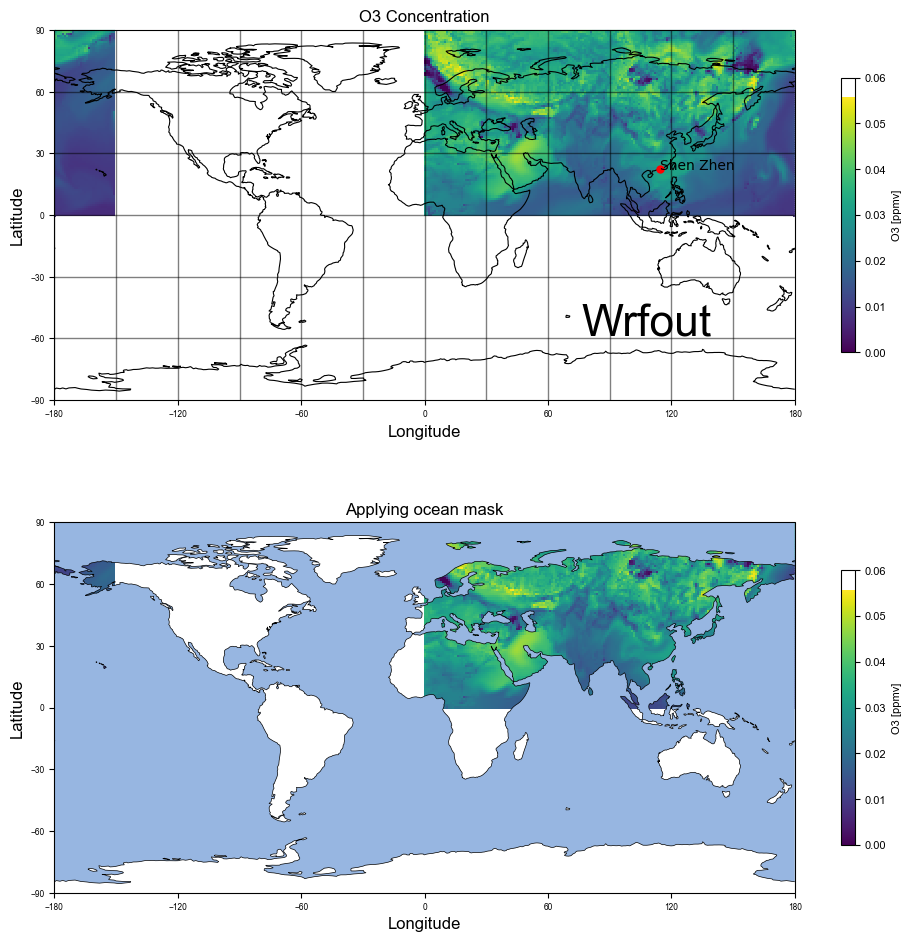

In [39]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Set projection
proj = ccrs.PlateCarree()

# Create an axis
ax = plt.subplot(2, 1, 1, projection = proj)
# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Add lat/lon gridlines
# Draw gridlines, the gridlines need to be plotted with the SAME project!
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

# Plot the surface ozone concentration
ozone = o3.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})

# Set fonts
font01 = {'family':'Arial', 'weight':'normal','size':12}
font02 = {'family':'Arial', 'weight':'normal','size':8}
font03 = {'family':'Arial', 'weight':'normal','size':6}
font04 = {'family':'Arial', 'weight':'normal','size':32}

# Set colorbar
ozone.colorbar.set_label('O3 [ppmv]', fontdict = font02)
# Set the font of number on colorbar
tick_labels = ozone.colorbar.ax.get_yticklabels()
for label in tick_labels:
    label.set_fontproperties(font02)
# Set new ticks
new_ticks = np.arange(0, 0.061, 0.01)
ozone.colorbar.set_ticks(new_ticks)


# Set the extent to cover the entire globe
ax.set_extent([-180, 180, -90, 90])

# Set title
plt.title('O3 Concentration', fontdict = font01)

# Set x and y labels
ax.set_xlabel('Longitude',font01)
ax.set_ylabel('Latitude',font01)

# Set x and y ticks
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax.tick_params(axis='both',  labelfontfamily='Arial', labelsize=6)

# Add text
ax.text(0.80, 0.15, 'Wrfout', va='bottom', ha='center', fontdict = font04, transform=ax.transAxes)

# Add point and annomation
ax.plot(114.3, 22.3, 'ro', markersize=5, transform=ccrs.PlateCarree())
ax.annotate('Shen Zhen', xy=(114.3, 22.3), xytext=(114.3, 22.3), transform=ccrs.PlateCarree())

# Mask ocean data by adding ocean feature and changing its zorder
ax2 = plt.subplot(2, 1, 2, projection=proj)
ax2.coastlines(linewidths=0.5)

# Plot the ozone data
ozone = o3.plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})
ax2.add_feature(cfeature.OCEAN, linewidth=0.8, zorder=1)
plt.title("Applying ocean mask", fontdict = font01)

# Set colorbar
ozone.colorbar.set_label('O3 [ppmv]', fontdict = font02)
# Set the font of number on colorbar
tick_labels = ozone.colorbar.ax.get_yticklabels()
for label in tick_labels:
    label.set_fontproperties(font02)
# Set new ticks
new_ticks = np.arange(0, 0.061, 0.01)
ozone.colorbar.set_ticks(new_ticks)


# Set the extent to cover the entire globe
ax2.set_extent([-180, 180, -90, 90])

# Set x and y labels
ax2.set_xlabel('Longitude',font01)
ax2.set_ylabel('Latitude',font01)

# Set x and y ticks
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax2.tick_params(axis='both',  labelfontfamily='Arial', labelsize=6)

plt.tight_layout()


d:\Software\Anaconda\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


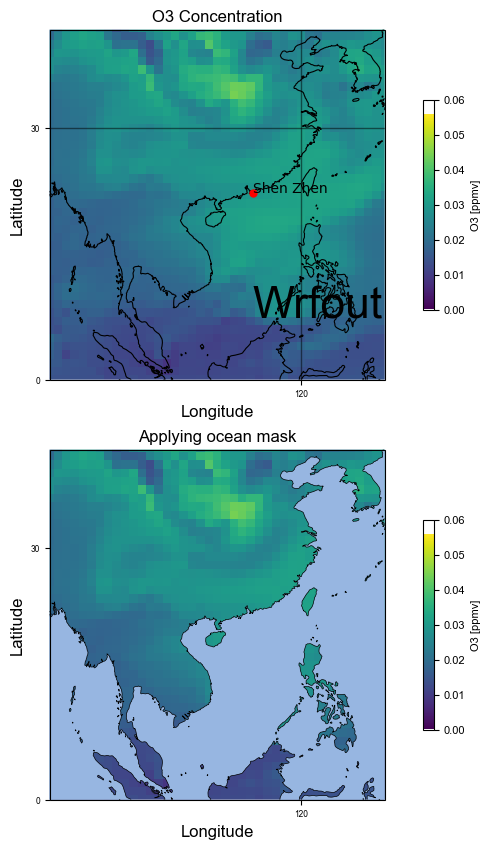

In [47]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Set projection
proj = ccrs.PlateCarree()

# Create an axis
ax = plt.subplot(2, 1, 1, projection = proj)
# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Add lat/lon gridlines
# Draw gridlines, the gridlines need to be plotted with the SAME project!
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

# Plot the surface ozone concentration
ozone = o3.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})

# Set fonts
font01 = {'family':'Arial', 'weight':'normal','size':12}
font02 = {'family':'Arial', 'weight':'normal','size':8}
font03 = {'family':'Arial', 'weight':'normal','size':6}
font04 = {'family':'Arial', 'weight':'normal','size':32}

# Set colorbar
ozone.colorbar.set_label('O3 [ppmv]', fontdict = font02)
# Set the font of number on colorbar
tick_labels = ozone.colorbar.ax.get_yticklabels()
for label in tick_labels:
    label.set_fontproperties(font02)
# Set new ticks
new_ticks = np.arange(0, 0.061, 0.01)
ozone.colorbar.set_ticks(new_ticks)

# Set title
plt.title('O3 Concentration', fontdict = font01)

# Set x and y labels
ax.set_xlabel('Longitude',font01)
ax.set_ylabel('Latitude',font01)

# Set x and y ticks
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax.tick_params(axis='both',  labelfontfamily='Arial', labelsize=6)

# Add text
ax.text(0.80, 0.15, 'Wrfout', va='bottom', ha='center', fontdict = font04, transform=ax.transAxes)

# Add point and annomation
ax.plot(114.3, 22.3, 'ro', markersize=5, transform=ccrs.PlateCarree())
ax.annotate('Shen Zhen', xy=(114.3, 22.3), xytext=(114.3, 22.3), transform=ccrs.PlateCarree())

# Set the extent to cover the region
ax.set_extent([90, 130, 0, 40])

# Mask ocean data by adding ocean feature and changing its zorder
ax2 = plt.subplot(2, 1, 2, projection=proj)
ax2.coastlines(linewidths=0.5)

# Plot the ozone data
ozone = o3.plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})
ax2.add_feature(cfeature.OCEAN, linewidth=0.8, zorder=1)
plt.title("Applying ocean mask", fontdict = font01)

# Set colorbar
ozone.colorbar.set_label('O3 [ppmv]', fontdict = font02)
# Set the font of number on colorbar
tick_labels = ozone.colorbar.ax.get_yticklabels()
for label in tick_labels:
    label.set_fontproperties(font02)
# Set new ticks
new_ticks = np.arange(0, 0.061, 0.01)
ozone.colorbar.set_ticks(new_ticks)

# Set x and y labels
ax2.set_xlabel('Longitude',font01)
ax2.set_ylabel('Latitude',font01)

# Set x and y ticks
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax2.tick_params(axis='both',  labelfontfamily='Arial', labelsize=6)

# Set the extent to cover the entire globe
ax2.set_extent([90, 130, 0, 40])

